In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# Load the data and split it into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Get the image shape
print(X_train.shape)
print(X_test.shape)

# Take a look at the first image in the training dataset
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  1

In [4]:
# Print the image label
y_train[0]

5

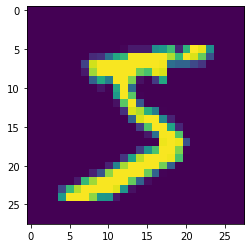

In [5]:
# Show the image as a picture
plt.imshow(X_train[0])

In [6]:
# Reshape the data to fit the model
X_train = X_train.reshape(60000, 28, 28, 1)  # Depth=1 (Grey scale from white to black)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
# One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
# model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # The loss function is used for more than 2 outputs

In [10]:
# Train the model
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 3ms/step - loss: 2.0188 - accuracy: 0.9036 - val_loss: 0.1041 - val_accuracy: 0.9665
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9776 - val_loss: 0.0942 - val_accuracy: 0.9735
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.1064 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0946 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.1281 - val_accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.1360 - val_accuracy: 0.9731
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9905 - val_loss: 0.1644 - val_accuracy

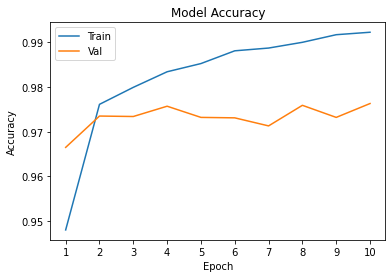

In [11]:
# Visualize the models accuracy
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
dim = np.arange(10)
plt.xticks(dim, epoch)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"], loc='upper left')
plt.show()

In [12]:
# Show predictions as probabilities for the first 5 images in the test set
predictions = model.predict(X_test[:5])
print(predictions)

[[8.11449463e-28 0.00000000e+00 4.60291517e-18 6.50007459e-17
  4.57566593e-37 3.41132199e-31 0.00000000e+00 1.00000000e+00
  1.59688671e-22 1.25338400e-19]
 [3.48153636e-17 1.95016473e-18 1.00000000e+00 7.01785822e-18
  8.78013700e-32 9.97837112e-28 6.77853257e-16 7.43841188e-36
  2.01357036e-22 8.13480019e-34]
 [4.78241795e-13 1.00000000e+00 2.25706877e-13 3.20118975e-19
  1.03632066e-12 8.68148685e-17 1.08223991e-15 3.24556549e-12
  6.35395792e-10 2.70301978e-15]
 [1.00000000e+00 1.03071689e-22 5.28974087e-12 8.72343511e-20
  1.41877088e-18 4.31442900e-20 1.05280385e-14 6.80240507e-19
  4.93749153e-18 1.62999188e-15]
 [6.64545470e-36 1.38920416e-31 5.31082597e-28 1.05650521e-29
  1.00000000e+00 9.84423530e-34 2.22244720e-26 4.92214791e-25
  1.02051502e-19 1.22166861e-16]]


In [13]:
# Print out predictions as number labels for the first 5 images
print(np.argmax(predictions, axis=1))  # vertical axis

# Print the actual labels
print(y_test[:5])

# THEY SHOULD MATCH

[7 2 1 0 4]
[7 2 1 0 4]


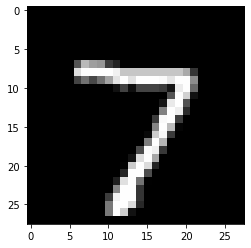

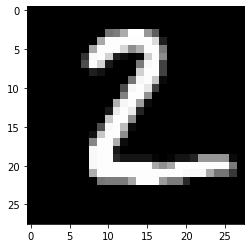

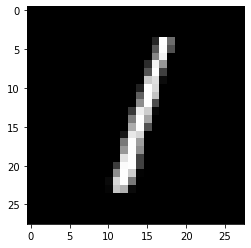

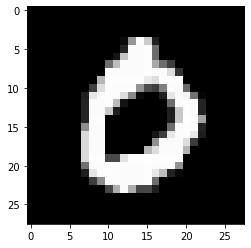

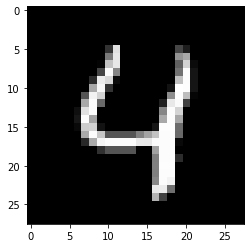

In [14]:
# Show the first 5 images as picture
for i in range(5):
    image = X_test[i]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()